In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import keras
import tensorflow_addons as tfa

2023-02-07 19:18:41.832706: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Importing classification dataset from preprocessing folder 
data = pd.read_excel('../preprocessing/classificationData.xlsx')

In [3]:
#drop out id column
data.drop(['id number'], axis=1, inplace=True)

In [4]:
#We define X and y
X = data.drop('Recurrence',axis=1)
y = data['Recurrence']

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4793016035561585501
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6454181888
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14597790608592472668
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-02-07 19:18:43.179600: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-07 19:18:43.198850: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 19:18:43.216505: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 19:18:43.216707: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but th

In [6]:
X

Mean radius  Mean texture  Mean perimeter  Mean area  Mean smothness  \
0          18.02         27.60          117.50     1013.0         0.09489   
1          17.99         10.38          122.80     1001.0         0.11840   
2          21.37         17.44          137.50     1373.0         0.08836   
3          11.42         20.38           77.58      386.1         0.14250   
4          20.29         14.34          135.10     1297.0         0.10030   
..           ...           ...             ...        ...             ...   
193        22.52         21.92          146.90     1597.0         0.07592   
194        15.44         31.18          101.00      740.4         0.09399   
195        17.17         29.19          110.00      915.3         0.08952   
196        21.42         22.84          145.00     1440.0         0.10700   
197        16.70         28.13          110.30      885.4         0.08896   

     Mean compactness  Mean concavity  Mean concave points  Mean symmetry  \
0             0.10360         0.10860              0.07055         0.1865   
1             0.27760         0.30010              0.14710         0.2419   
2             0.11890         0.12550              0.08180         0.2333   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
193           0.09162         0.06862              0.06367         0.1728   
194           0.10620         0.13750              0.06500         0.1735   
195           0.06655         0.06583              0.05068         0.1793   
196           0.19390         0.23800              0.13180         0.1884   
197           0.11310         0.10120              0.04989         0.1890   

     Mean fractal dimension  ...  Worst perimeter  Worst area  \
0                   0.06333  ...           139.70      1436.0   
1                   0.07871  ...           184.60      2019.0   
2                   0.06010  ...           159.10      1949.0   
3                   0.09744  ...            98.87       567.7   
4                   0.05883  ...           152.20      1575.0   
..                      ...  ...              ...         ...   
193                 0.05262  ...           162.10      1902.0   
194                 0.06105  ...           112.60       929.0   
195                 0.05392  ...           132.50      1295.0   
196                 0.06472  ...           198.30      2375.0   
197                 0.06035  ...           128.80      1213.0   

     Worst smothness  Worst compactness  Worst concavity  \
0            0.11950             0.1926           0.3140   
1            0.16220             0.6656           0.7119   
2            0.11880             0.3449           0.3414   
3            0.20980             0.8663           0.6869   
4            0.13740             0.2050           0.4000   
..               ...                ...              ...   
193          0.08191             0.1319           0.1056   
194          0.12720             0.2362           0.2975   
195          0.12610             0.1572           0.2141   
196          0.14980             0.4379           0.5411   
197          0.13300             0.2808           0.3455   

     Worst concave points  Worst symmetry  Worst fractal dimension  \
0                 0.11700          0.2677                  0.08113   
1                 0.26540          0.4601                  0.11890   
2                 0.20320          0.4334                  0.09067   
3                 0.25750          0.6638                  0.17300   
4                 0.16250          0.2364                  0.07678   
..                    ...             ...                      ...   
193               0.09378          0.2061                  0.05788   
194               0.12860          0.2914                  0.08024   
195               0.095

<AxesSubplot: xlabel='Recurrence', ylabel='count'>

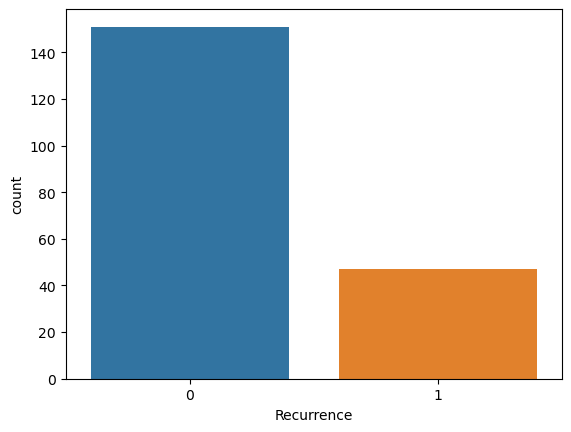

In [7]:
sns.countplot(x=y)

In [8]:
def plot_loss(history, label):
    # Use a log scale on y-axis to show the wide range of values.
    plt.semilogy(history.epoch, history.history['loss'], label='Train ' + label)
    plt.semilogy(history.epoch, history.history['val_loss'], label='Val ' + label, linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

In [9]:
def plot_metrics(history):
  metrics = ['loss', 'accuracy', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [10]:
EPOCHS = 200
BATCH_SIZE = 100

In [11]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=.8)

In [13]:
np.log(y.to_list().count(1) / y.to_list().count(0))

-1.1671322351048659

In [14]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    tfa.metrics.FBetaScore(num_classes: 2, beta = 6.0, name: str = 'fbeta_score')
]

output_bias = np.log(y.to_list().count(1) / y.to_list().count(0))

def make_model(metrics=METRICS):
    model = keras.Sequential([
        keras.layers.Normalization(),
        keras.layers.Dense(
          250, activation='relu'),
        keras.layers.Dropout(0.6),
        keras.layers.Dense(1, activation='sigmoid', bias_initializer=keras.initializers.Constant(output_bias))])

    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)
    return model

2023-02-07 19:18:43.705628: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 19:18:43.705824: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 19:18:43.705935: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 19:18:43.706231: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 19:18:43.706363: I tensorflow/compiler/xla/stream_executo

In [15]:
model = make_model()
bias_history = model.fit(
    train_X,
    train_y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=.2,
    verbose=0)

2023-02-07 19:18:44.953115: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [16]:
mpl.rcParams['figure.figsize'] = [15, 12]

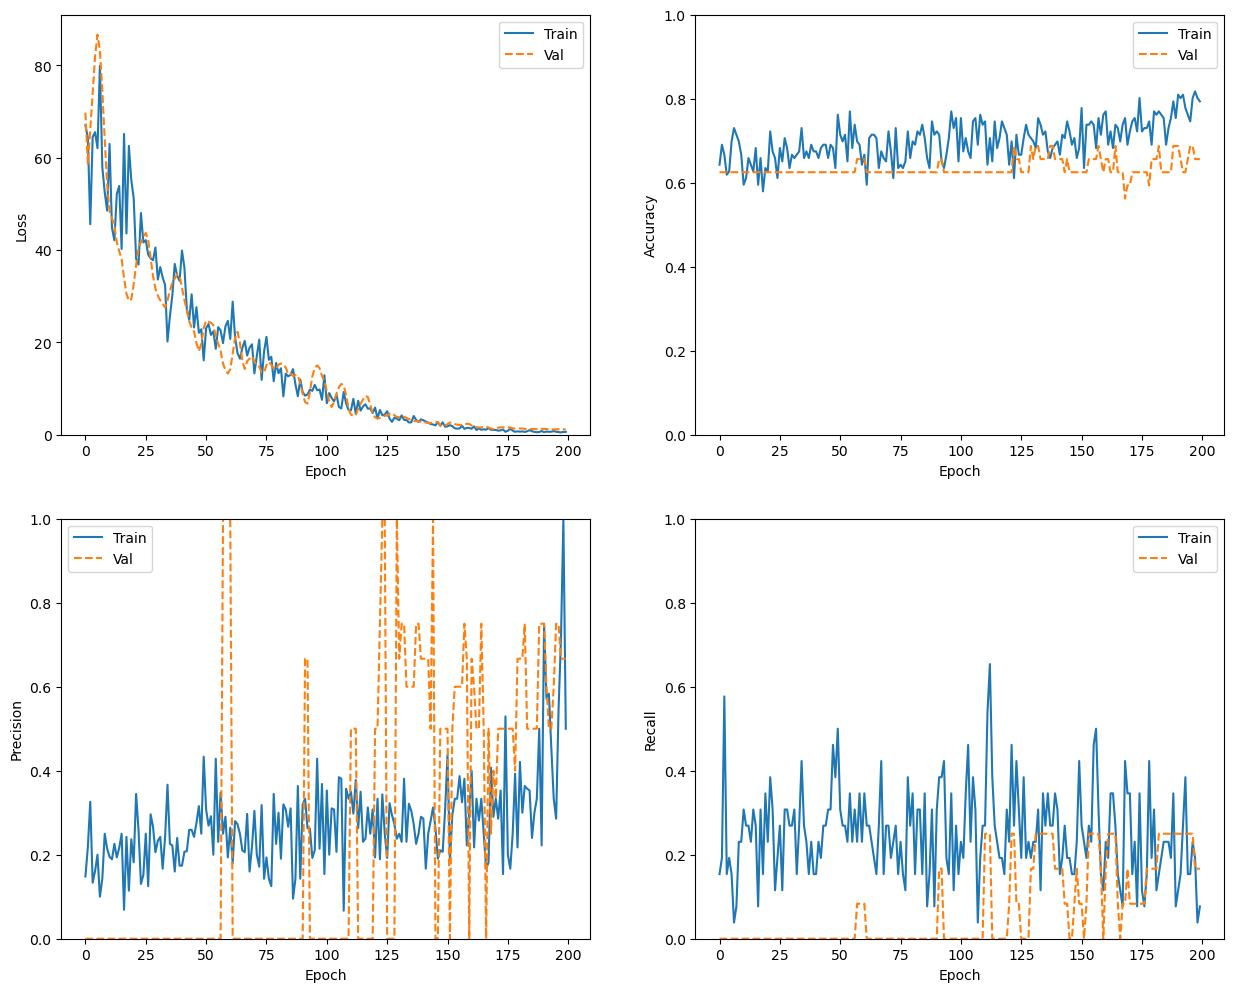

In [17]:
plot_metrics(bias_history)
plt.savefig("metricsUnweighted.png", dpi=300, bbox_inches='tight')

In [18]:
model.evaluate(train_X, train_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.6122 - tp: 4.0000 - fp: 2.0000 - tn: 118.0000 - fn: 34.0000 - accuracy: 0.7722 - precision: 0.6667 - recall: 0.1053          


[0.6121689081192017,
 4.0,
 2.0,
 118.0,
 34.0,
 0.7721518874168396,
 0.6666666865348816,
 0.10526315867900848]

In [19]:
model.evaluate(test_X, test_y)

2/2 [==============================] - 0s 8ms/step - loss: 0.5436 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 31.0000 - fn: 9.0000 - accuracy: 0.7750 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.5436328053474426, 0.0, 0.0, 31.0, 9.0, 0.7749999761581421, 0.0, 0.0]

In [20]:
precision_recall_fscore_support(test_y, model.predict(test_X) > .5, beta=6, average="binary")

2/2 [==============================] - 0s 3ms/step


/usr/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0, None)

2/2 [==============================] - 0s 2ms/step


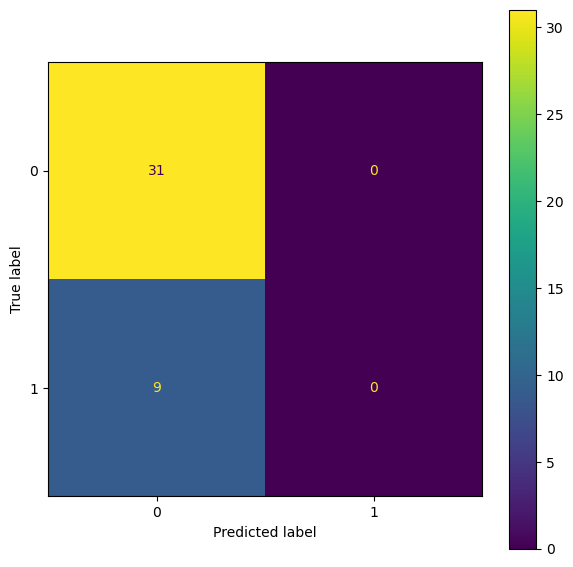

In [21]:
mpl.rcParams['figure.figsize'] = [7, 7]
ConfusionMatrixDisplay.from_predictions(test_y, model.predict(test_X) > .5)
plt.savefig("confUnweighted.png", dpi=300, bbox_inches='tight')

In [22]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    tfa.metrics.FBetaScore(num_classes: 2, beta = 6.0, name: str = 'fbeta_score')
]

output_bias = np.log(y.to_list().count(1) / y.to_list().count(0))

def make_model(metrics=METRICS):
    model = keras.Sequential([
        keras.layers.Normalization(),
        keras.layers.Dense(
          230, activation='relu'),
        keras.layers.Dropout(0.7),
        keras.layers.Dense(1, activation='sigmoid', bias_initializer=keras.initializers.Constant(output_bias))])

    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)
    return model

In [23]:
nonRecurrent = train_y.to_list().count(0)

In [24]:
recurrent = train_y.to_list().count(1)

In [25]:
total = nonRecurrent + recurrent

In [26]:
weightNr = total / (2 * nonRecurrent)
weightR = total / (2 * recurrent)

In [27]:
class_weights = {0: weightNr, 1: weightR}

In [28]:
model = make_model()
bias_history = model.fit(
    train_X,
    train_y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=.2,
    class_weight=class_weights,
    verbose=0)

In [29]:
mpl.rcParams['figure.figsize'] = [15, 12]

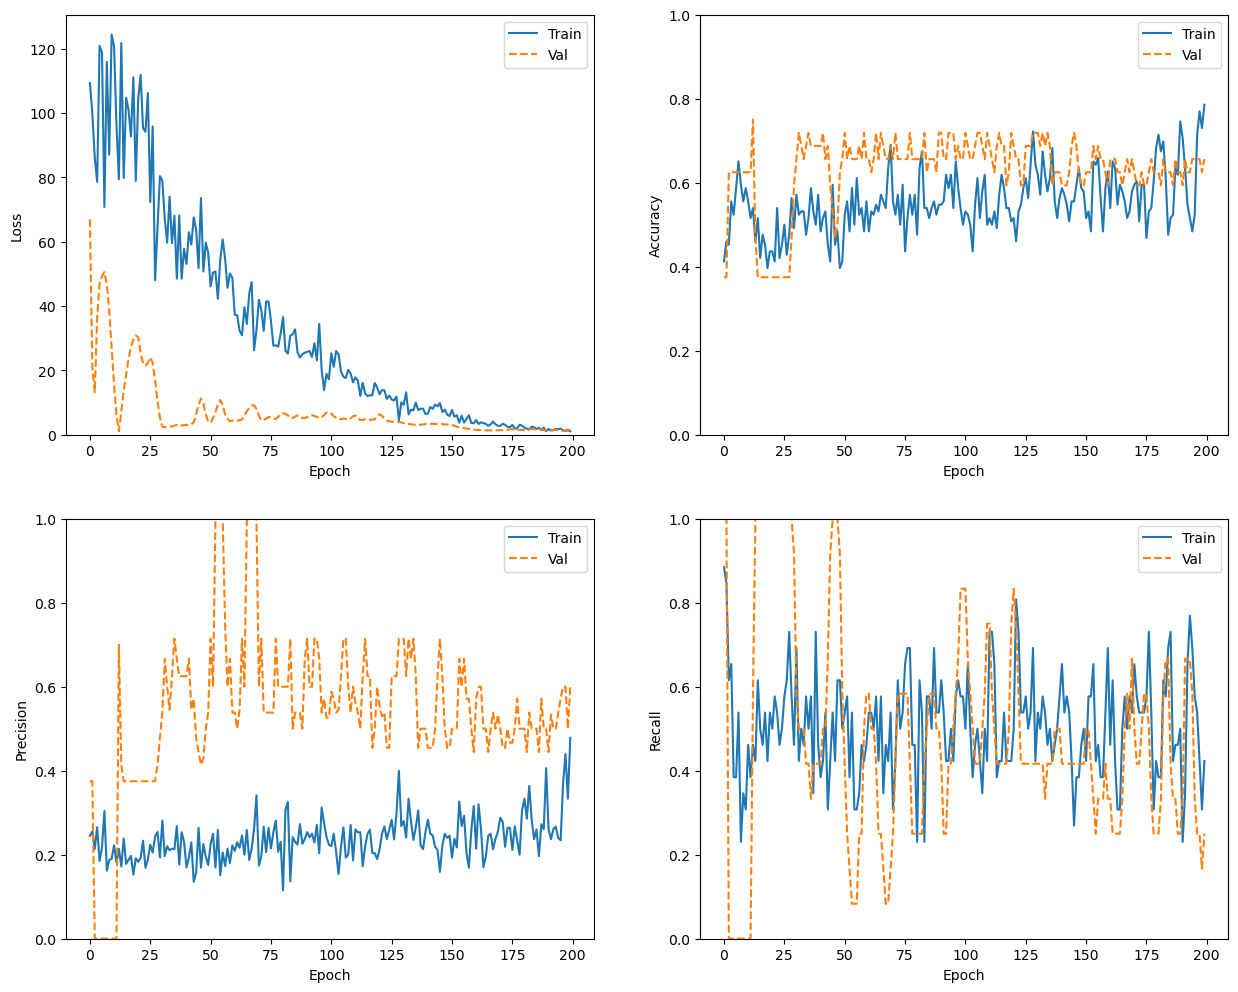

In [30]:
plot_metrics(bias_history)
plt.savefig("metricsWeighted.png", dpi=300, bbox_inches='tight')

In [31]:
model.evaluate(train_X, train_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.6505 - tp: 11.0000 - fp: 6.0000 - tn: 114.0000 - fn: 27.0000 - accuracy: 0.7911 - precision: 0.6471 - recall: 0.2895


[0.650492787361145,
 11.0,
 6.0,
 114.0,
 27.0,
 0.7911392450332642,
 0.6470588445663452,
 0.28947368264198303]

In [32]:
model.evaluate(test_X, test_y)

2/2 [==============================] - 0s 7ms/step - loss: 0.7620 - tp: 2.0000 - fp: 2.0000 - tn: 29.0000 - fn: 7.0000 - accuracy: 0.7750 - precision: 0.5000 - recall: 0.2222


[0.7619736790657043,
 2.0,
 2.0,
 29.0,
 7.0,
 0.7749999761581421,
 0.5,
 0.2222222238779068]

In [33]:
precision_recall_fscore_support(test_y, model.predict(test_X) > .5, beta=6, average="binary")

2/2 [==============================] - 0s 2ms/step


(0.5, 0.2222222222222222, 0.22560975609756095, None)

2/2 [==============================] - 0s 3ms/step


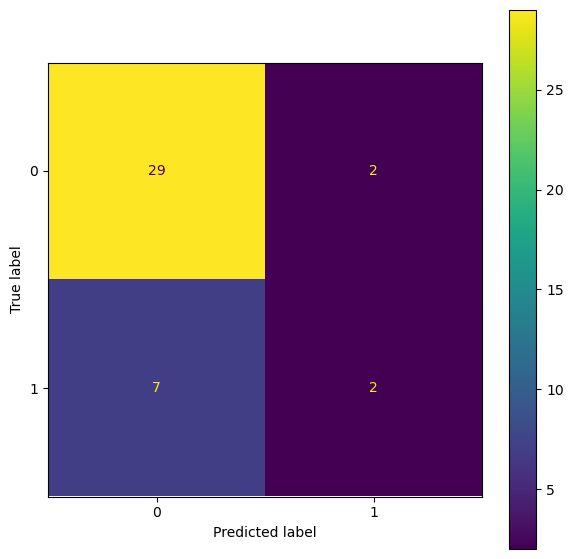

In [34]:
mpl.rcParams['figure.figsize'] = [7, 7]
ConfusionMatrixDisplay.from_predictions(test_y, model.predict(test_X) > .5)
plt.savefig("confWeighted.png", dpi=300, bbox_inches='tight')

In [35]:
mpl.rcParams['figure.figsize'] = [15, 12]

In [36]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
]

output_bias = np.log(y.to_list().count(1) / y.to_list().count(0))

def make_model(metrics=METRICS):
    model = keras.Sequential([
        keras.layers.Normalization(),
        keras.layers.Dense(26, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(238, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1, activation="sigmoid", bias_initializer=keras.initializers.Constant(output_bias))])

    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)
    return model

In [37]:
model = make_model()
bias_history = model.fit(
    train_X,
    train_y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=.2,
    class_weight=class_weights,
    verbose=0)

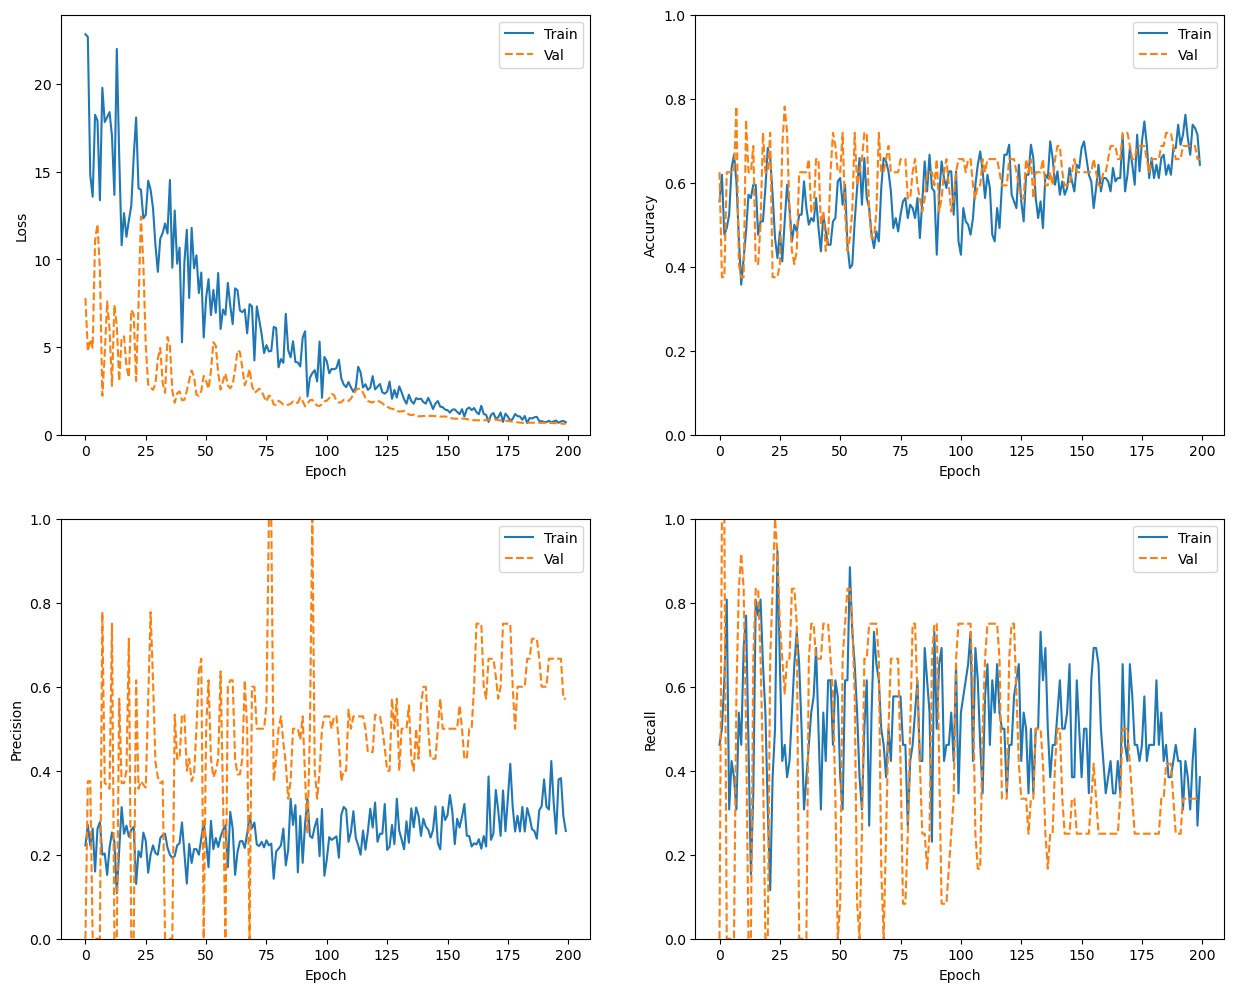

In [38]:
plot_metrics(bias_history)
plt.savefig("metricsComplex.png", dpi=300, bbox_inches='tight')

In [39]:
model.evaluate(train_X, train_y)

5/5 [==============================] - 0s 2ms/step - loss: 0.6034 - tp: 16.0000 - fp: 20.0000 - tn: 100.0000 - fn: 22.0000 - accuracy: 0.7342 - precision: 0.4444 - recall: 0.4211


[0.6034188866615295,
 16.0,
 20.0,
 100.0,
 22.0,
 0.7341772317886353,
 0.4444444477558136,
 0.42105263471603394]

In [40]:
model.evaluate(test_X, test_y)

2/2 [==============================] - 0s 6ms/step - loss: 0.5823 - tp: 2.0000 - fp: 5.0000 - tn: 26.0000 - fn: 7.0000 - accuracy: 0.7000 - precision: 0.2857 - recall: 0.2222


[0.5823085904121399,
 2.0,
 5.0,
 26.0,
 7.0,
 0.699999988079071,
 0.2857142984867096,
 0.2222222238779068]

In [41]:
precision_recall_fscore_support(test_y, model.predict(test_X) > .5, beta=6, average="binary")

2/2 [==============================] - 0s 2ms/step


(0.2857142857142857, 0.2222222222222222, 0.22356495468277945, None)

2/2 [==============================] - 0s 2ms/step


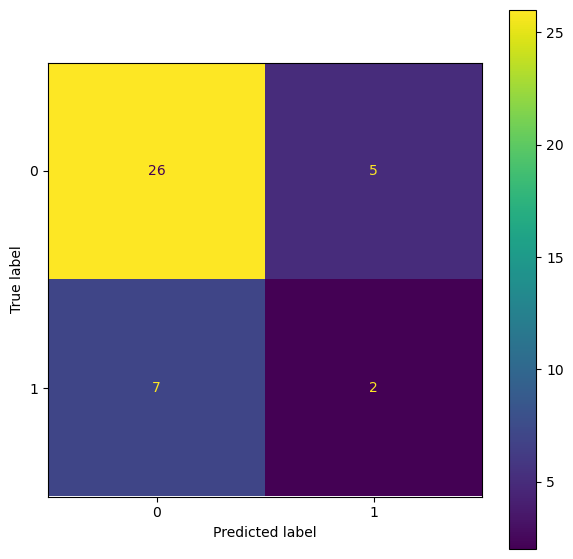

In [42]:
mpl.rcParams['figure.figsize'] = [7, 7]
ConfusionMatrixDisplay.from_predictions(test_y, model.predict(test_X) > .5)
plt.savefig("confComplex.png", dpi=300, bbox_inches='tight')